# Disaggregation

In [1]:
from utilities.std_imports import *
from timedisagg.td import TempDisagg
plt.rcParams["figure.figsize"] = (26,10)

In [2]:
raw_data = pd.read_csv('D:/data/csv/time_series/trains.csv', parse_dates=['Datetime'], infer_datetime_format=True, index_col = 'Datetime')
daily = raw_data.resample('D').sum()[:-1]
print('Daily:', daily.shape[0])
daily.head()

Daily: 140


,Count
Datetime,
2012-09-13,72
2012-09-14,84
2012-09-15,92
2012-09-16,70
2012-09-17,92


### Weekly

In [3]:
weekly = daily.resample('W').sum()
print('Weekly: ', weekly.shape[0])
weekly

Weekly:  21


,Count
Datetime,
2012-09-16,318
2012-09-23,792
2012-09-30,1040
2012-10-07,0
2012-10-14,494
2012-10-21,2444
2012-10-28,1758
2012-11-04,1122
2012-11-11,0


In [4]:
daily['dow'] = daily.index
daily['dow'] = [di.weekday() for di in daily.index]
w_dist = daily.groupby(['dow'],as_index=False)['Count'].sum()
w_sum = w_dist['Count'].sum()
w_dist['perc'] = w_dist['Count'] / w_sum 
w_dist

,dow,Count,perc
0,0,5022,0.168659
1,1,4824,0.162010
2,2,4182,0.140449
3,3,4274,0.143538
4,4,4364,0.146561
5,5,2910,0.097730
6,6,4200,0.141053


In [5]:
daily_w = []
for w in weekly['Count']:
    for p in w_dist['perc']:
        daily_w.append(round(w*p))
daily_w = pd.DataFrame(daily_w[:-7], index=daily.index)
daily_w.shape

(140, 1)

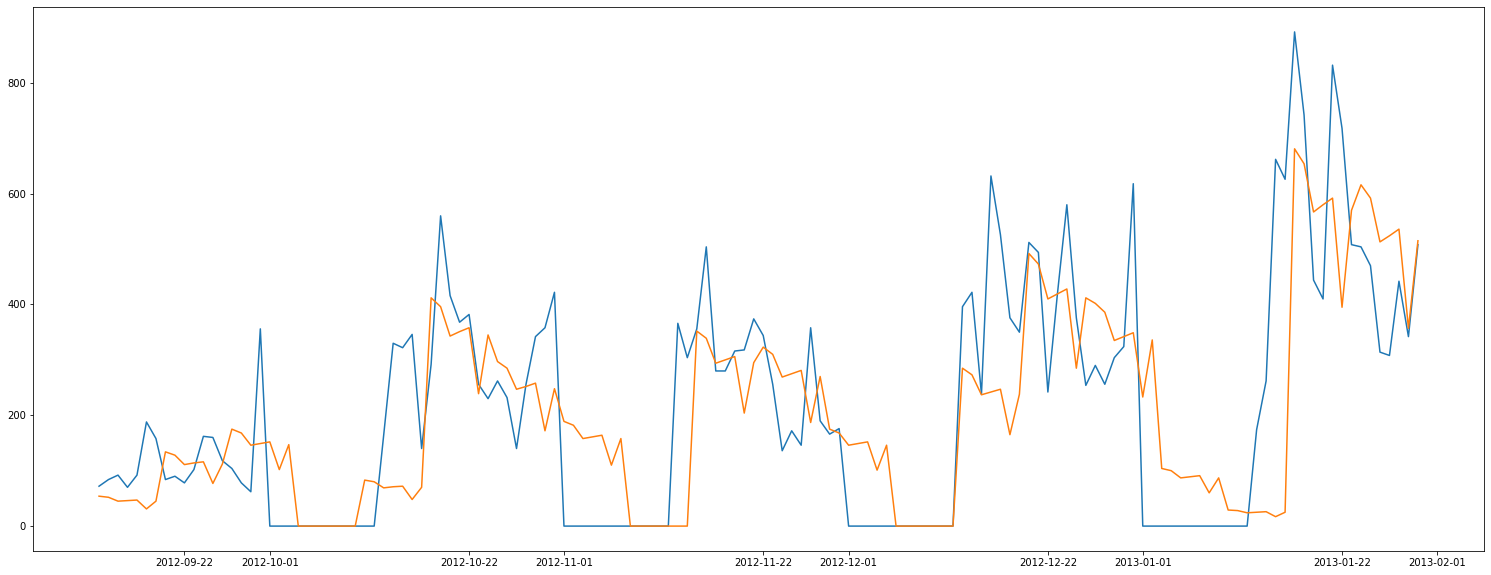

In [6]:
plt.plot(daily['Count'])
plt.plot(daily_w);

### Monthly

In [31]:
monthly = daily.resample('M').sum()
print('Monthly rows: ', monthly.shape[0])
monthly

Monthly rows:  5


,Count,dow,day
Datetime,,,
2012-09-30,2150,60,387
2012-10-31,5818,87,496
2012-11-30,5042,91,465
2012-12-31,7608,95,496
2013-01-31,9158,87,465


In [34]:
daily['month'] = daily.index.month
m_dist = daily.groupby(['day', 'month'],as_index=False)['Count'].sum()
daily

,Count,dow,day,month
Datetime,,,,
2012-09-13,72,3,13,9
2012-09-14,84,4,14,9
2012-09-15,92,5,15,9
2012-09-16,70,6,16,9
2012-09-17,92,0,17,9
...,...,...,...,...
2013-01-26,314,5,26,1
2013-01-27,308,6,27,1
2013-01-28,442,0,28,1


In [54]:
oct = m_dist[m_dist['month']==10]
tot_oct = oct['Count'].sum()
oct['perc'] = round(oct['Count']/tot_oct,2)
oct

<ipython-input-54-f290badb4d6f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oct['perc'] = round(oct['Count']/tot_oct,2)


,day,month,Count,perc
1,1,10,0,0.00
5,2,10,0,0.00
9,3,10,0,0.00
13,4,10,0,0.00
17,5,10,0,0.00
21,6,10,0,0.00
25,7,10,0,0.00
29,8,10,0,0.00
33,9,10,0,0.00
37,10,10,0,0.00
